In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import torch as th
import numpy as np
import matplotlib.pyplot as plt

from datasets import Shape2D
from algorithms import dense_point_generation


import lovely_tensors as lt
lt.monkey_patch()

2023-03-23 20:43:53.052210: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 20:43:59.051637: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: Ne peut ouvrir le fichier d'objet partagé: Aucun fichier ou dossier de ce type
2023-03-23 20:43:59.052043: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: Ne peut ouvrir le fichier d'objet partagé: Aucun fichier ou dossier de ce type
2023-03-23 20:43:59.052097: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen so

# Define best models for each dataset

In [25]:
models = {
    'data-3': {
        'clamp': {
            'l1': 'stellar-donkey-291/epoch=99-step=8000.ckpt',
            'l2': 'generous-dream-289/epoch=87-step=7040.ckpt',
        },
        'no-clamp': {
            'l1': 'devoted-oath-292/epoch=98-step=7920.ckpt',
            'l2': 'fancy-wind-290/epoch=99-step=8000.ckpt',
        },
    },
    'data-4': {
        'clamp': {
            'l1': 'driven-dawn-295/epoch=99-step=8000.ckpt',
            'l2': 'pretty-river-293/epoch=99-step=8000.ckpt',
        },
        'no-clamp': {
            'l1': 'charmed-paper-296/epoch=99-step=8000.ckpt',
            'l2': 'warm-darkness-294/epoch=99-step=8000.ckpt',
        }
    },
    'data-5': {
        'clamp': {
            'l1': 'crimson-moon-299/epoch=18-step=1520.ckpt',
            'l2': 'dulcet-flower-297/epoch=15-step=1280.ckpt',
        },
        'no-clamp': {
            'l1': 'icy-wildflower-300/epoch=13-step=1120.ckpt',
            'l2': 'glamorous-pine-298/epoch=19-step=1600.ckpt',
        }
    },
    'data-6': {
        'clamp': {
            'l1': 'celestial-shadow-303/epoch=98-step=7920.ckpt',
            'l2': 'comic-sunset-301/epoch=99-step=8000.ckpt',
        },
        'no-clamp': {
            'l1': 'dashing-shadow-304/epoch=99-step=8000.ckpt',
            'l2': 'devout-darkness-302/epoch=98-step=7920.ckpt',
        }
    },
}

# Clamp vs no clamp

iter 1: 0.00%
iter 2: 5.05%
iter 3: 50.98%
iter 1: 0.00%
iter 2: 3.10%
iter 3: 32.24%
iter 4: 91.08%
iter 1: 0.00%
iter 2: 4.91%
iter 3: 82.45%
iter 1: 0.00%
iter 2: 2.73%
iter 3: 56.68%


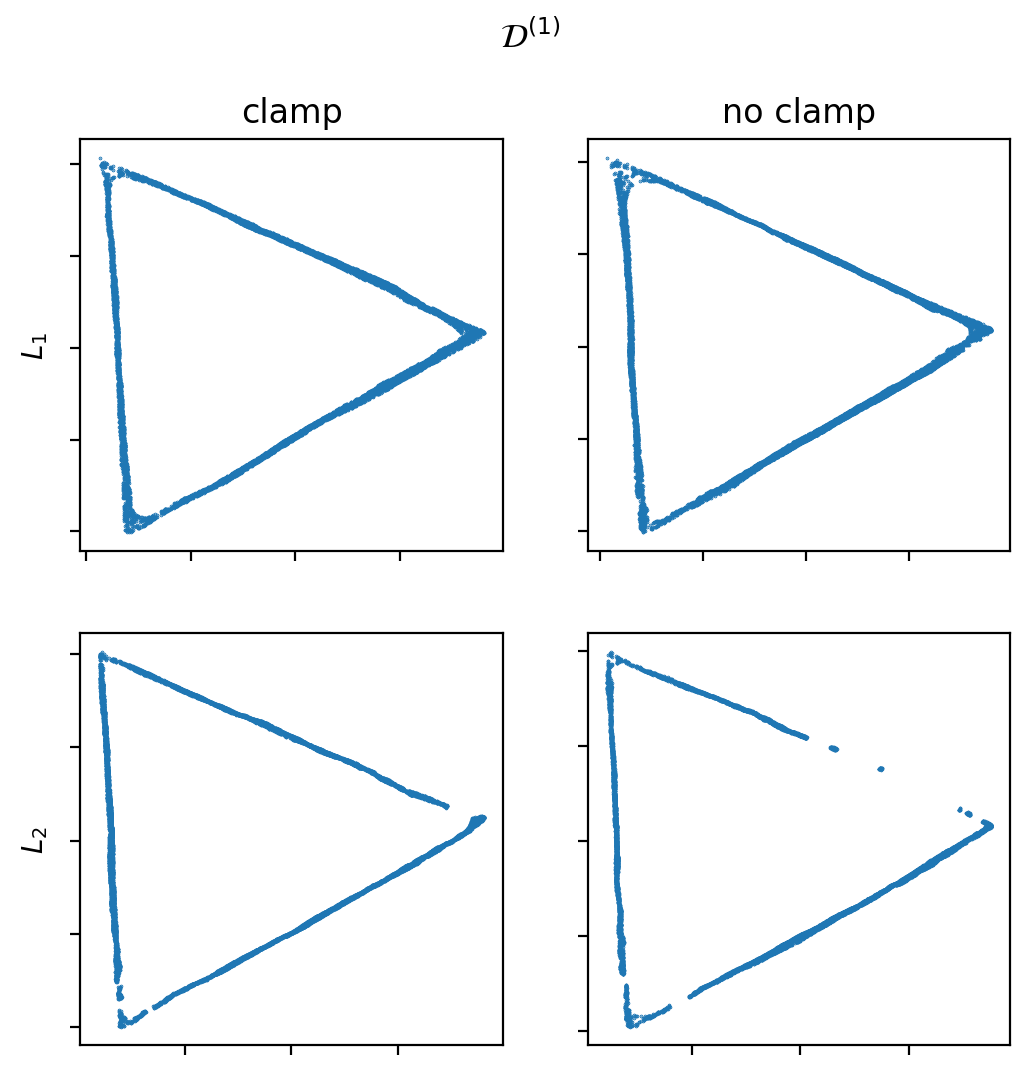

iter 1: 0.00%
iter 2: 2.41%
iter 3: 34.21%
iter 4: 95.57%
iter 1: 0.00%
iter 2: 2.67%
iter 3: 32.04%
iter 4: 87.38%
iter 1: 0.00%
iter 2: 2.83%
iter 3: 67.00%
iter 1: 0.00%
iter 2: 2.90%
iter 3: 62.70%


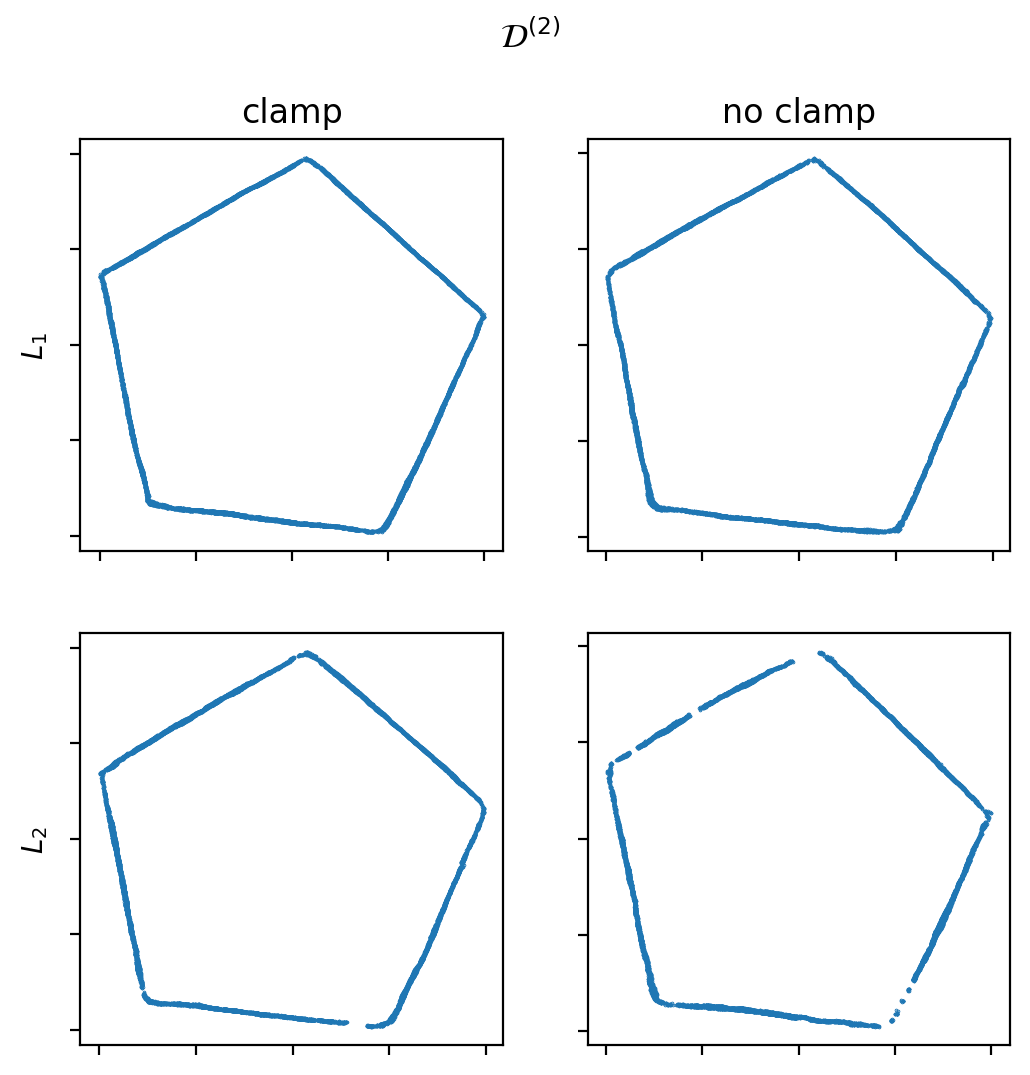

iter 1: 0.00%
iter 2: 4.78%
iter 3: 31.64%
iter 4: 76.19%
iter 1: 0.00%
iter 2: 2.48%
iter 3: 13.21%
iter 4: 33.42%
iter 5: 60.13%
iter 6: 92.16%
iter 1: 0.00%
iter 2: 4.20%
iter 3: 56.36%
iter 1: 0.00%
iter 2: 1.89%
iter 3: 31.15%
iter 4: 71.01%


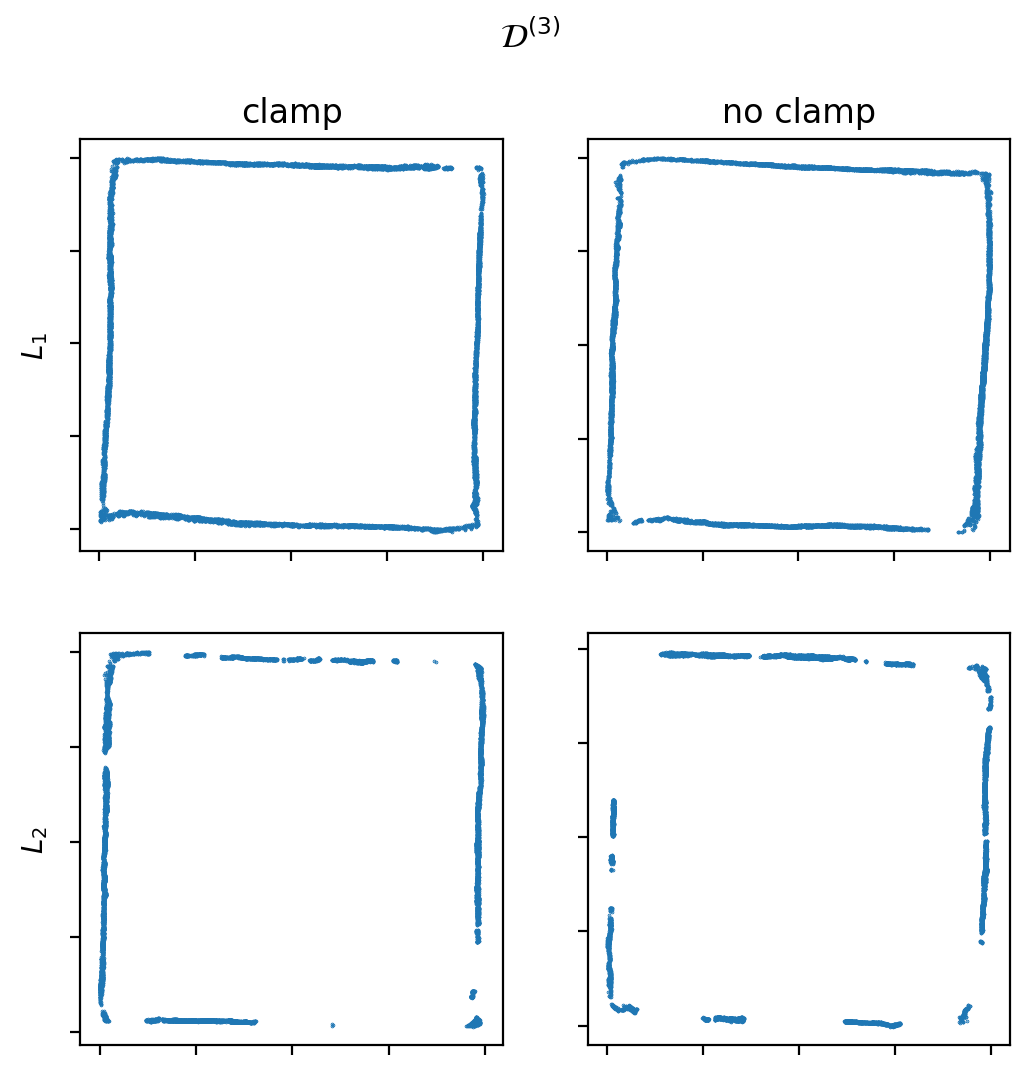

In [39]:
delta = .006

test_dataloader = th.utils.data.DataLoader(Shape2D(folder='data-1', mode='test'), batch_size=1, shuffle=False)
it = iter(test_dataloader)
for i, folder in enumerate(['data-3', 'data-4', 'data-6']):
    data, vox, dist = next(it)
    data, vox, dist = data[0], vox[0], dist[0]

    fig, axs = plt.subplots(2, 2, figsize=(6, 6), dpi=200)
    fig.suptitle(f'$\mathcal{{D}}^{{({i+1})}}$')
    for j, method in enumerate(['clamp', 'no-clamp']):
        for k, loss in enumerate(['l1', 'l2']):
            if j == 0:
                axs[k, 0].set_ylabel('$L_1$' if loss == 'l1' else '$L_2$')
            if k == 0:
                axs[k, j].set_title('clamp' if method == 'clamp' else 'no clamp')
            axs[k, j].axes.xaxis.set_ticklabels([])
            axs[k, j].axes.yaxis.set_ticklabels([])

            model = NDF.load_from_checkpoint(f'checkpoints/{models[folder][method][loss]}')
            model.eval()
            th.manual_seed(0)
            np.random.seed(0)
            dense = dense_point_generation(model, vox, n=10_000, delta=delta)

            axs[k, j].scatter(dense[:, 0], dense[:, 1], s=.1)
    plt.show()

# No Unif vs 0.2 Unif

iter 1: 0.00%
iter 2: 50.65%
iter 1: 0.00%
iter 2: 7.42%
iter 3: 17.17%
iter 4: 28.44%
iter 5: 41.70%
iter 6: 57.14%
iter 7: 74.29%
iter 8: 92.84%
iter 1: 0.00%
iter 2: 4.50%
iter 3: 37.59%
iter 4: 98.62%
iter 1: 0.00%
iter 2: 2.26%
iter 3: 23.03%
iter 4: 62.89%


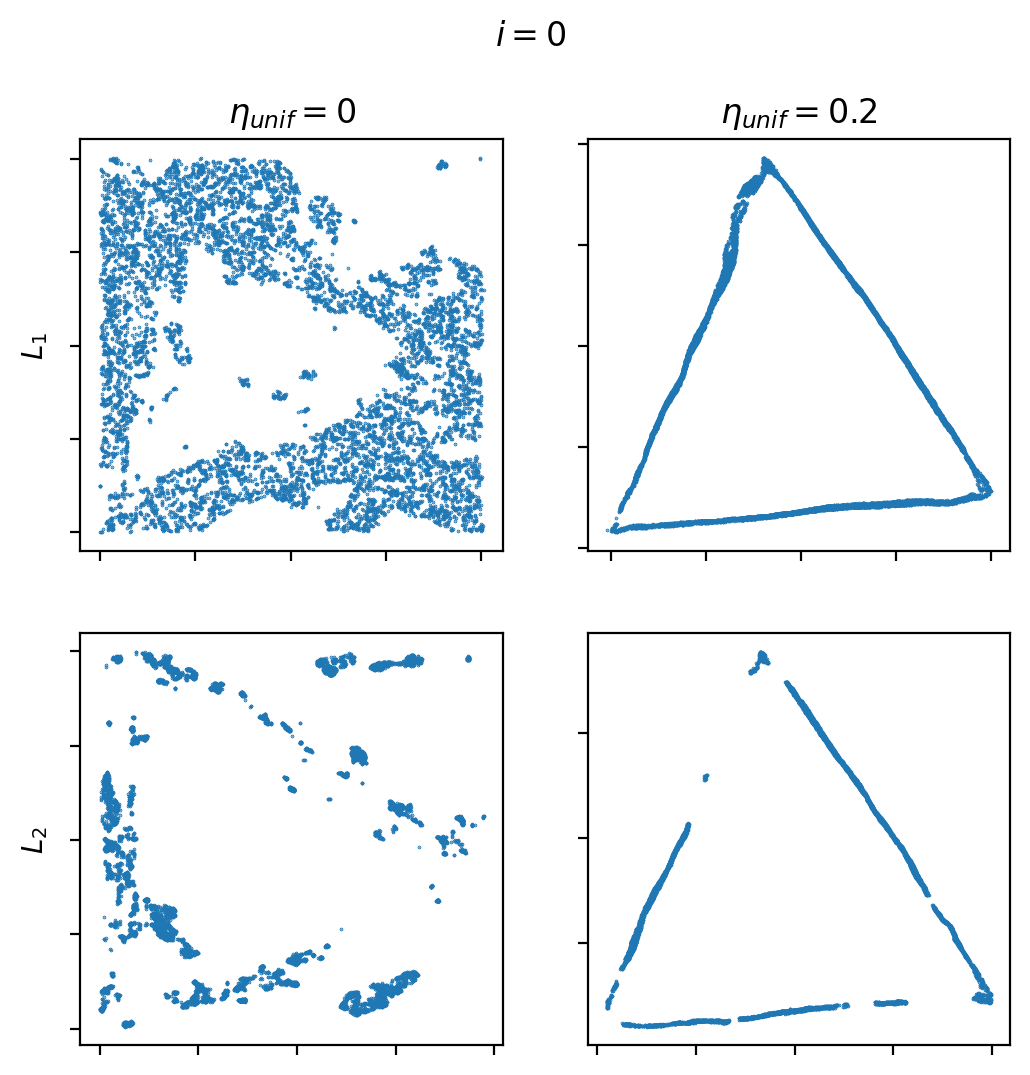

iter 1: 0.00%
iter 2: 70.48%
iter 1: 0.00%
iter 2: 6.32%
iter 3: 14.17%
iter 4: 23.85%
iter 5: 35.67%
iter 6: 49.28%
iter 7: 64.37%
iter 8: 80.82%
iter 9: 98.39%
iter 1: 0.00%
iter 2: 5.03%
iter 3: 43.28%
iter 1: 0.00%
iter 2: 2.19%
iter 3: 16.38%
iter 4: 45.45%
iter 5: 85.11%


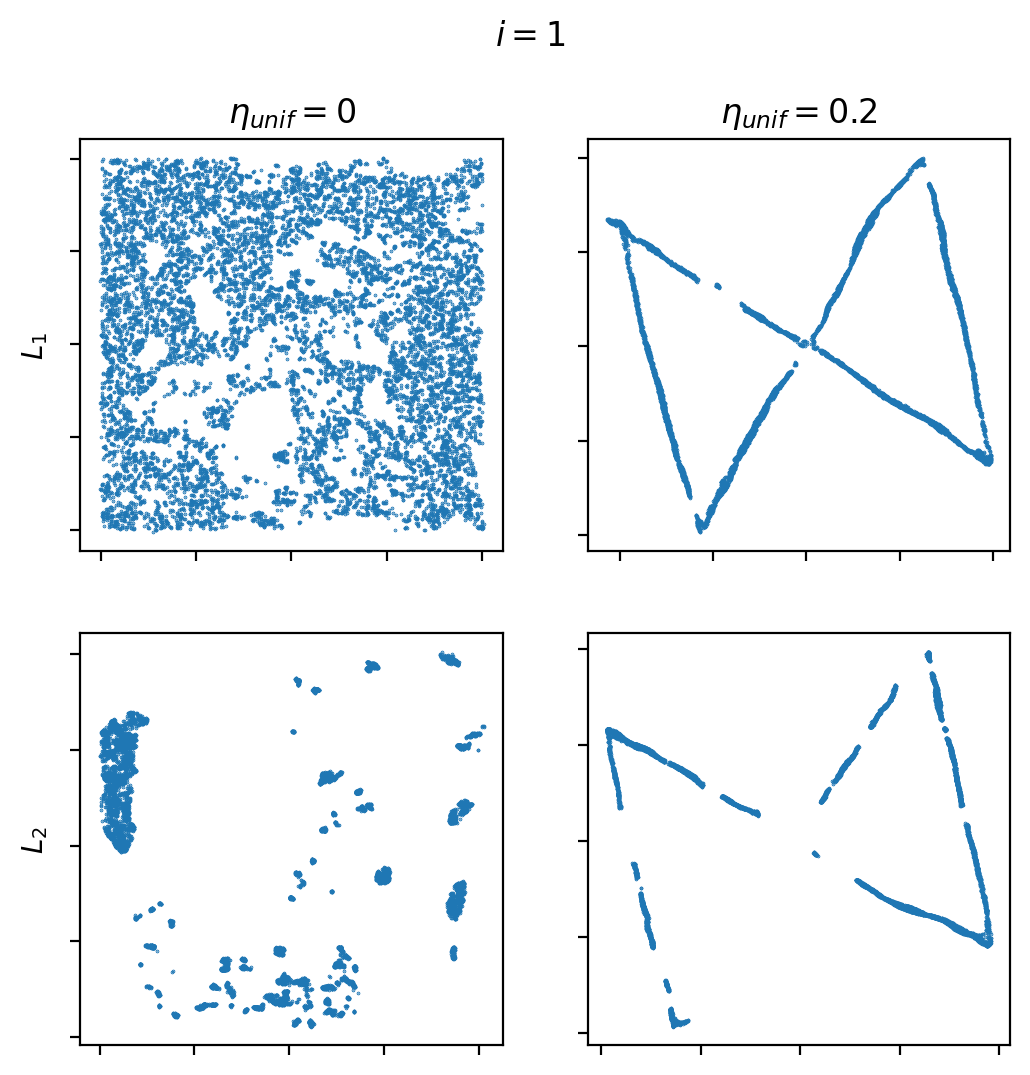

iter 1: 0.00%
iter 2: 32.40%
iter 3: 69.30%
iter 1: 0.00%
iter 2: 1.79%
iter 3: 4.81%
iter 4: 8.68%
iter 5: 13.08%
iter 6: 18.21%
iter 7: 24.15%
iter 8: 30.82%
iter 9: 38.51%
iter 10: 46.55%
iter 11: 55.00%
iter 12: 64.09%
iter 13: 73.88%
iter 14: 83.64%
iter 15: 93.57%
iter 1: 0.00%
iter 2: 3.15%
iter 3: 33.57%
iter 4: 92.37%
iter 1: 0.00%
iter 2: 1.88%
iter 3: 20.92%
iter 4: 59.72%


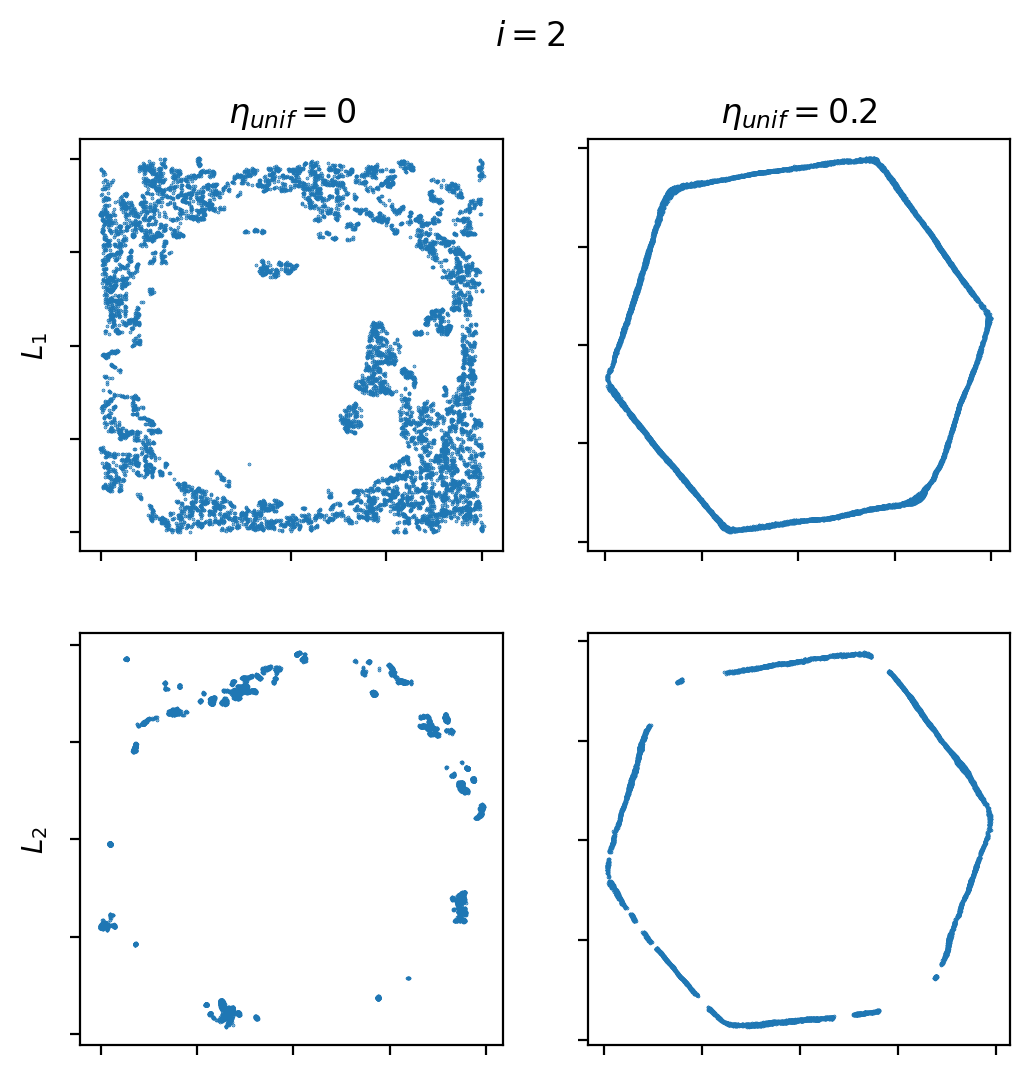

In [40]:
delta = .006

test_dataloader = th.utils.data.DataLoader(Shape2D(folder='data-2', mode='test'), batch_size=1, shuffle=False)
it = iter(test_dataloader)
for i in range(3):
    data, vox, dist = next(it)
    data, vox, dist = data[0], vox[0], dist[0]

    fig, axs = plt.subplots(2, 2, figsize=(6, 6), dpi=200)
    fig.suptitle(f'$i={i}$')
    for j, folder in enumerate(['data-5', 'data-6']):
        for k, loss in enumerate(['l1', 'l2']):
            if j == 0:
                axs[k, 0].set_ylabel('$L_1$' if loss == 'l1' else '$L_2$')
            if k == 0:
                axs[k, j].set_title('$\eta_{unif} = 0$' if folder == 'data-5' else '$\eta_{unif} = 0.2$')
            axs[k, j].axes.xaxis.set_ticklabels([])
            axs[k, j].axes.yaxis.set_ticklabels([])

            model = NDF.load_from_checkpoint(f'checkpoints/{models[folder]["clamp"][loss]}')
            model.eval()
            th.manual_seed(0)
            np.random.seed(0)
            dense = dense_point_generation(model, vox, n=10_000, delta=delta)

            axs[k, j].scatter(dense[:, 0], dense[:, 1], s=.1)
    plt.show()

# GT vs No GT

iter 1: 0.00%
iter 2: 2.23%
iter 3: 36.00%
iter 1: 0.00%
iter 2: 1.53%
iter 3: 28.64%
iter 4: 85.74%
iter 1: 0.00%
iter 2: 0.49%
iter 3: 12.93%
iter 4: 43.94%
iter 5: 85.07%
iter 1: 0.00%
iter 2: 0.84%
iter 3: 17.46%
iter 4: 53.64%


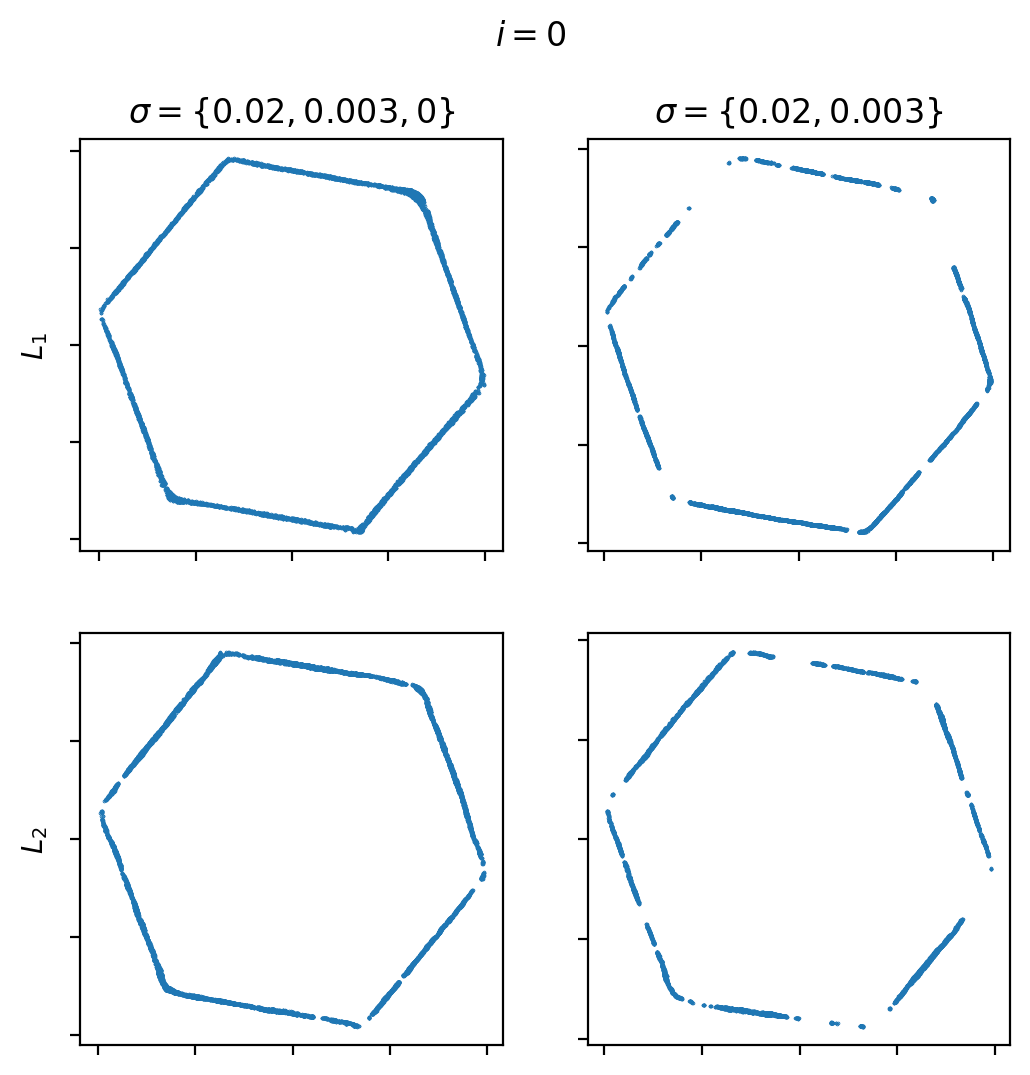

iter 1: 0.00%
iter 2: 3.00%
iter 3: 39.00%
iter 1: 0.00%
iter 2: 1.66%
iter 3: 23.61%
iter 4: 70.29%
iter 1: 0.00%
iter 2: 0.43%
iter 3: 7.29%
iter 4: 23.93%
iter 5: 48.04%
iter 6: 77.17%
iter 1: 0.00%
iter 2: 1.20%
iter 3: 17.51%
iter 4: 53.18%


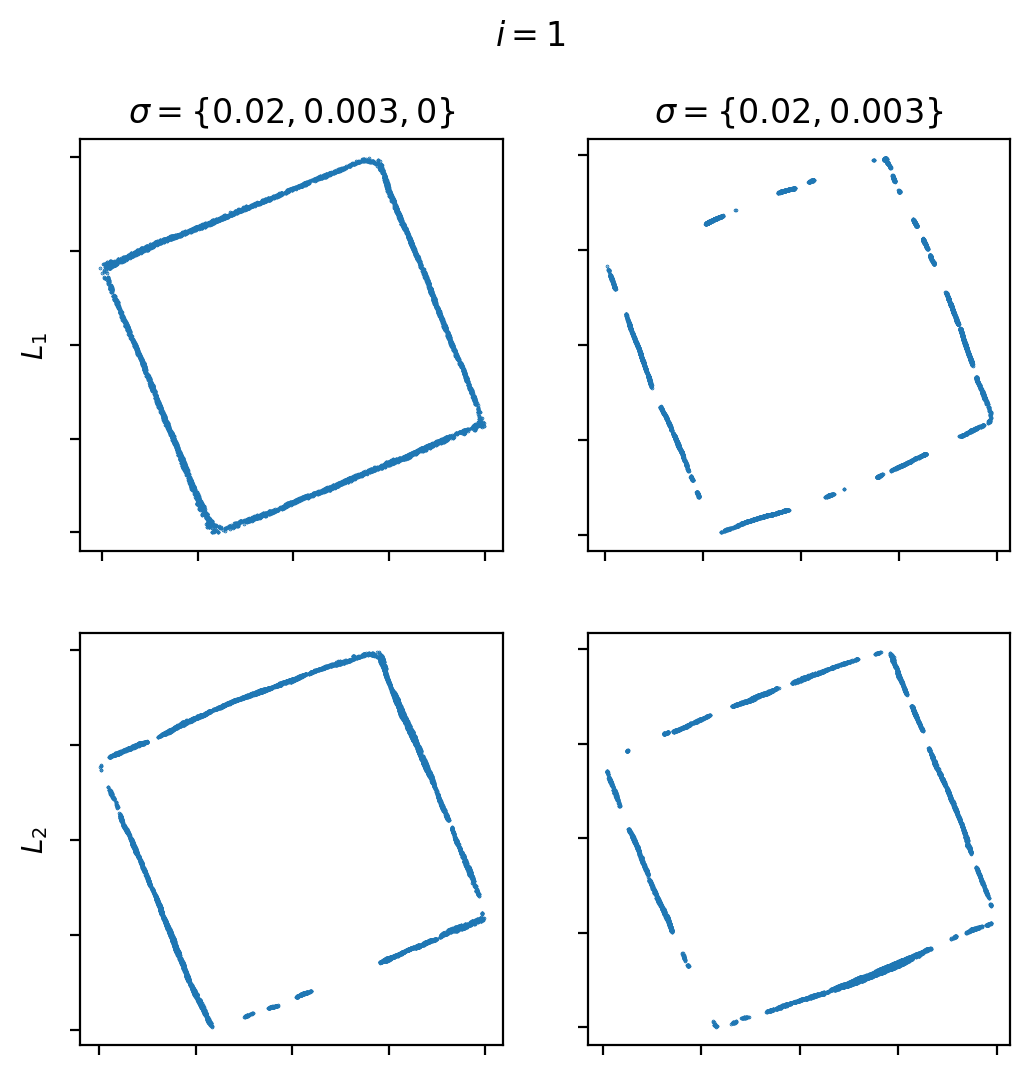

iter 1: 0.00%
iter 2: 2.81%
iter 3: 37.82%
iter 1: 0.00%
iter 2: 1.60%
iter 3: 22.09%
iter 4: 68.58%
iter 1: 0.00%
iter 2: 0.61%
iter 3: 12.15%
iter 4: 41.18%
iter 5: 79.94%
iter 1: 0.00%
iter 2: 1.31%
iter 3: 19.96%
iter 4: 58.18%


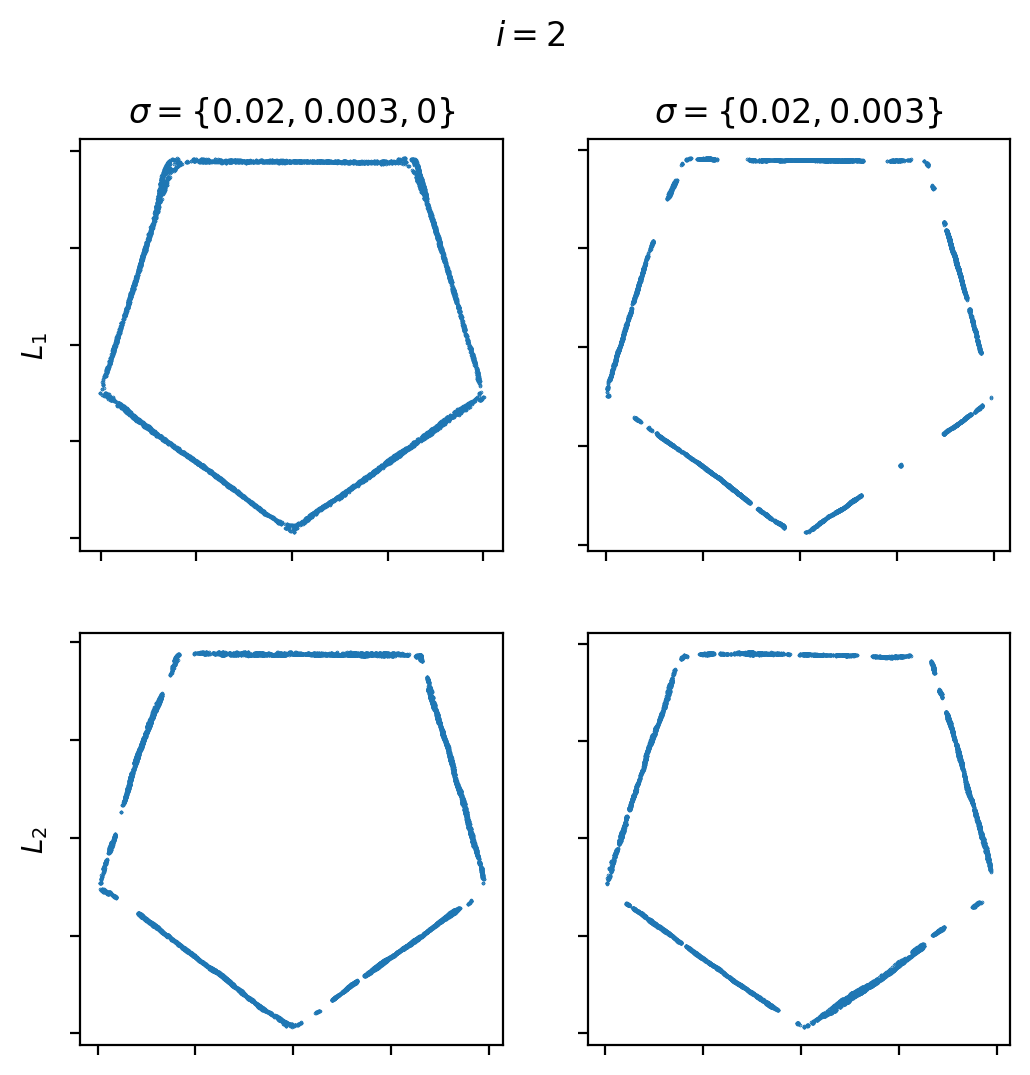

In [67]:
delta = .002

test_dataloader = th.utils.data.DataLoader(Shape2D(folder='data-1', mode='val'), batch_size=1, shuffle=False)
it = iter(test_dataloader)
next(it)
for i in range(3):
    data, vox, dist = next(it)
    data, vox, dist = data[0], vox[0], dist[0]

    fig, axs = plt.subplots(2, 2, figsize=(6, 6), dpi=200)
    fig.suptitle(f'$i={i}$')
    for j, folder in enumerate(['data-3', 'data-4']):
        for k, loss in enumerate(['l1', 'l2']):
            if j == 0:
                axs[k, 0].set_ylabel('$L_1$' if loss == 'l1' else '$L_2$')
            if k == 0:
                axs[k, j].set_title('$\sigma = \{0.02, 0.003, 0\}$' if folder == 'data-3' else '$\sigma = \{0.02, 0.003\}$')
            axs[k, j].axes.xaxis.set_ticklabels([])
            axs[k, j].axes.yaxis.set_ticklabels([])

            model = NDF.load_from_checkpoint(f'checkpoints/{models[folder]["clamp"][loss]}')
            model.eval()
            th.manual_seed(0)
            np.random.seed(0)
            dense = dense_point_generation(model, vox, n=10_000, delta=delta)

            axs[k, j].scatter(dense[:, 0], dense[:, 1], s=.1)
    plt.show()

# L1 vs L2

iter 1: 0.00%
iter 2: 3.16%
iter 3: 35.89%
iter 1: 0.00%
iter 2: 2.67%
iter 3: 28.75%
iter 4: 82.98%
iter 1: 0.00%
iter 2: 3.03%
iter 3: 35.07%
iter 4: 99.46%
iter 1: 0.00%
iter 2: 2.40%
iter 3: 28.48%
iter 4: 78.20%
iter 1: 0.00%
iter 2: 2.58%
iter 3: 35.47%
iter 1: 0.00%
iter 2: 1.88%
iter 3: 25.38%
iter 4: 74.18%
iter 1: 0.00%
iter 2: 3.96%
iter 3: 41.53%
iter 1: 0.00%
iter 2: 3.17%
iter 3: 33.70%
iter 4: 91.38%
iter 1: 0.00%
iter 2: 3.62%
iter 3: 25.30%
iter 4: 65.14%
iter 1: 0.00%
iter 2: 1.41%
iter 3: 7.89%
iter 4: 20.04%
iter 5: 36.77%
iter 6: 57.61%
iter 7: 82.23%
iter 1: 0.00%
iter 2: 3.95%
iter 3: 41.45%
iter 1: 0.00%
iter 2: 1.77%
iter 3: 14.69%
iter 4: 38.87%
iter 5: 71.14%


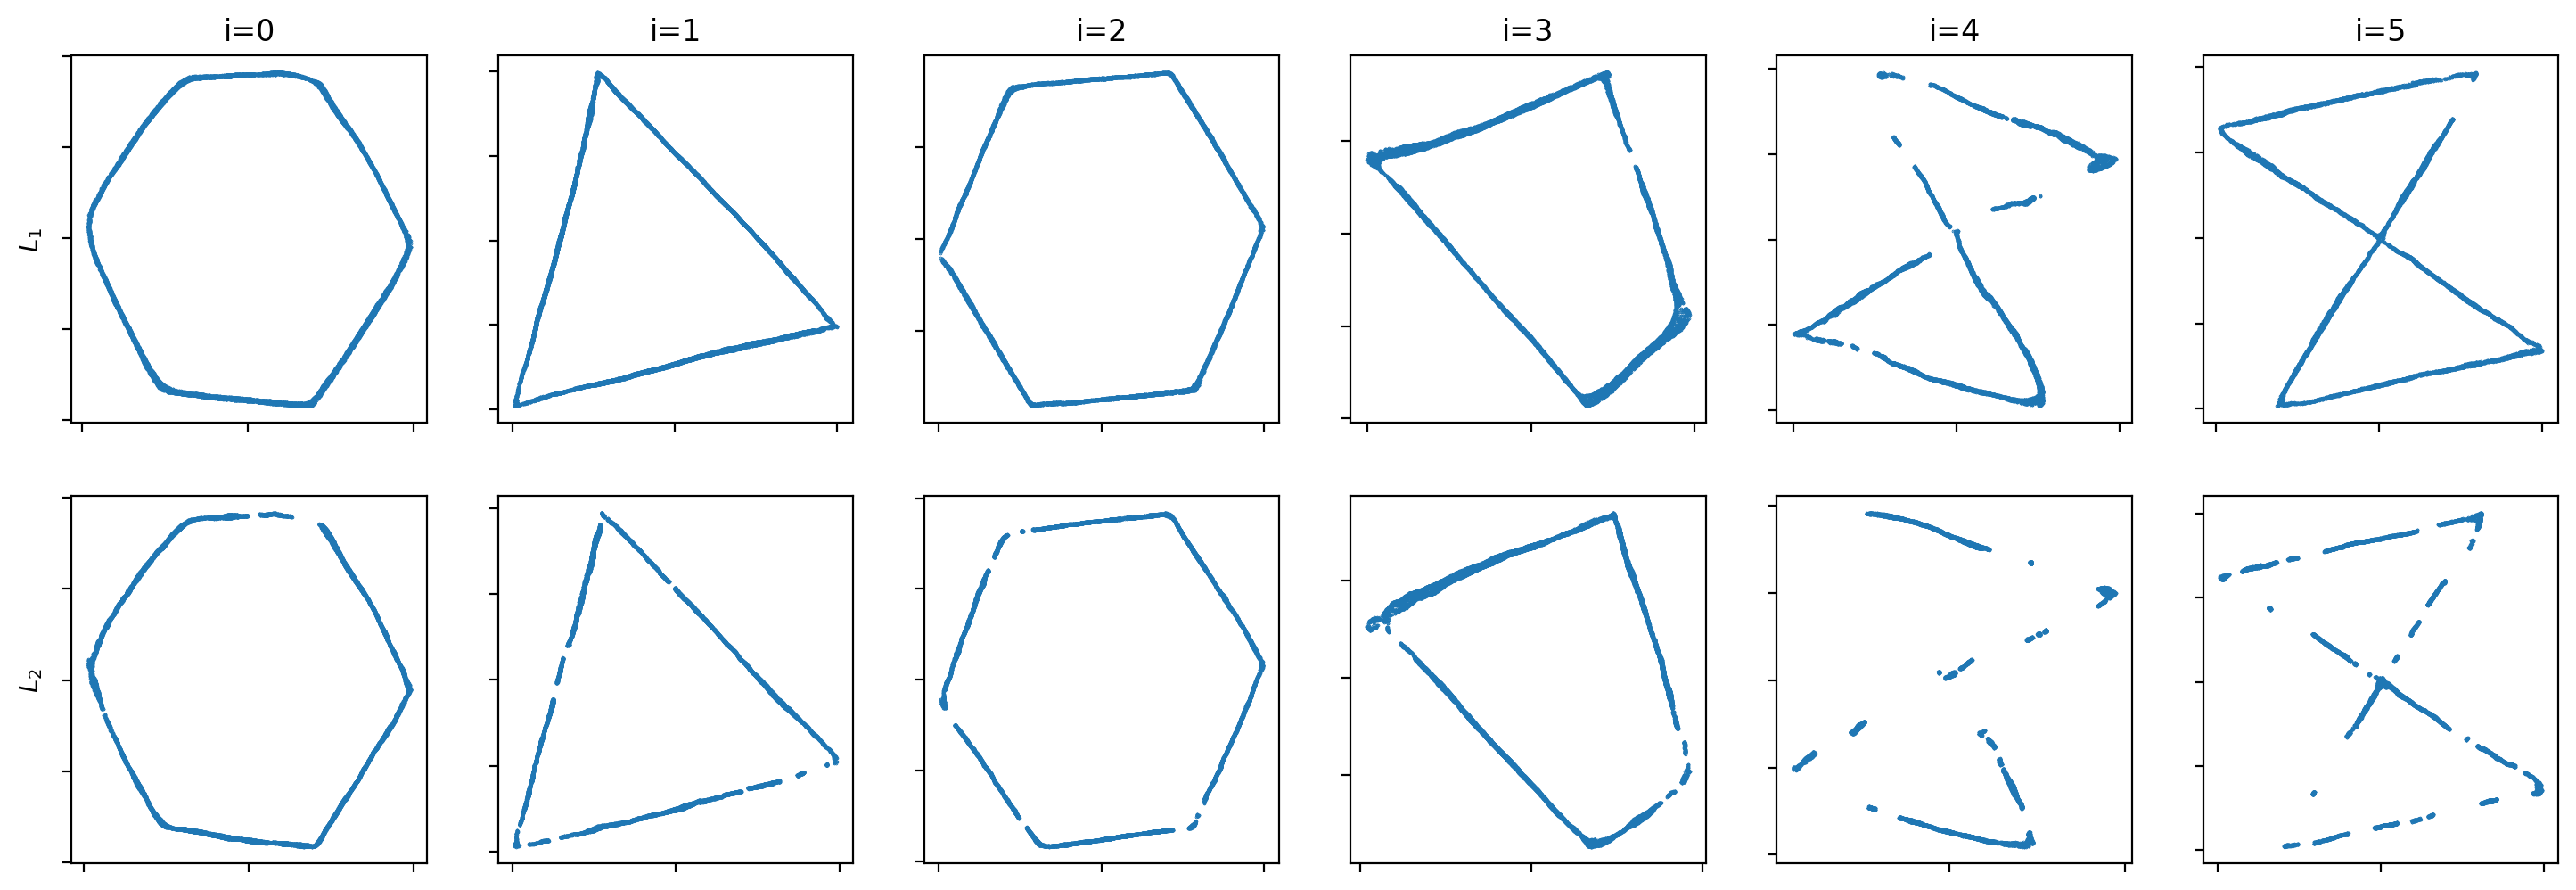

In [32]:
delta = .005

test_dataloader = th.utils.data.DataLoader(Shape2D(folder='data-5', mode='test'), batch_size=1, shuffle=False)
it = iter(test_dataloader)
fig, axs = plt.subplots(2, 6, figsize=(6*3, 6), dpi=200)
for i, folder in enumerate(['data-3', 'data-4', 'data-6']*2):
    data, vox, dist = next(it)
    data, vox, dist = data[0], vox[0], dist[0]

    for k, loss in enumerate(['l1', 'l2']):
        if i == 0:
            axs[k, 0].set_ylabel('$L_1$' if loss == 'l1' else '$L_2$')
        if k == 0:
            axs[k, i].set_title(f'i={i}')
        axs[k, i].axes.xaxis.set_ticklabels([])
        axs[k, i].axes.yaxis.set_ticklabels([])

        model = NDF.load_from_checkpoint(f'checkpoints/{models[folder]["clamp"][loss]}')
        model.eval()
        th.manual_seed(0)
        np.random.seed(0)
        dense = dense_point_generation(model, vox, n=20_000, delta=delta)

        axs[k, i].scatter(dense[:, 0], dense[:, 1], s=.1)

# Performances

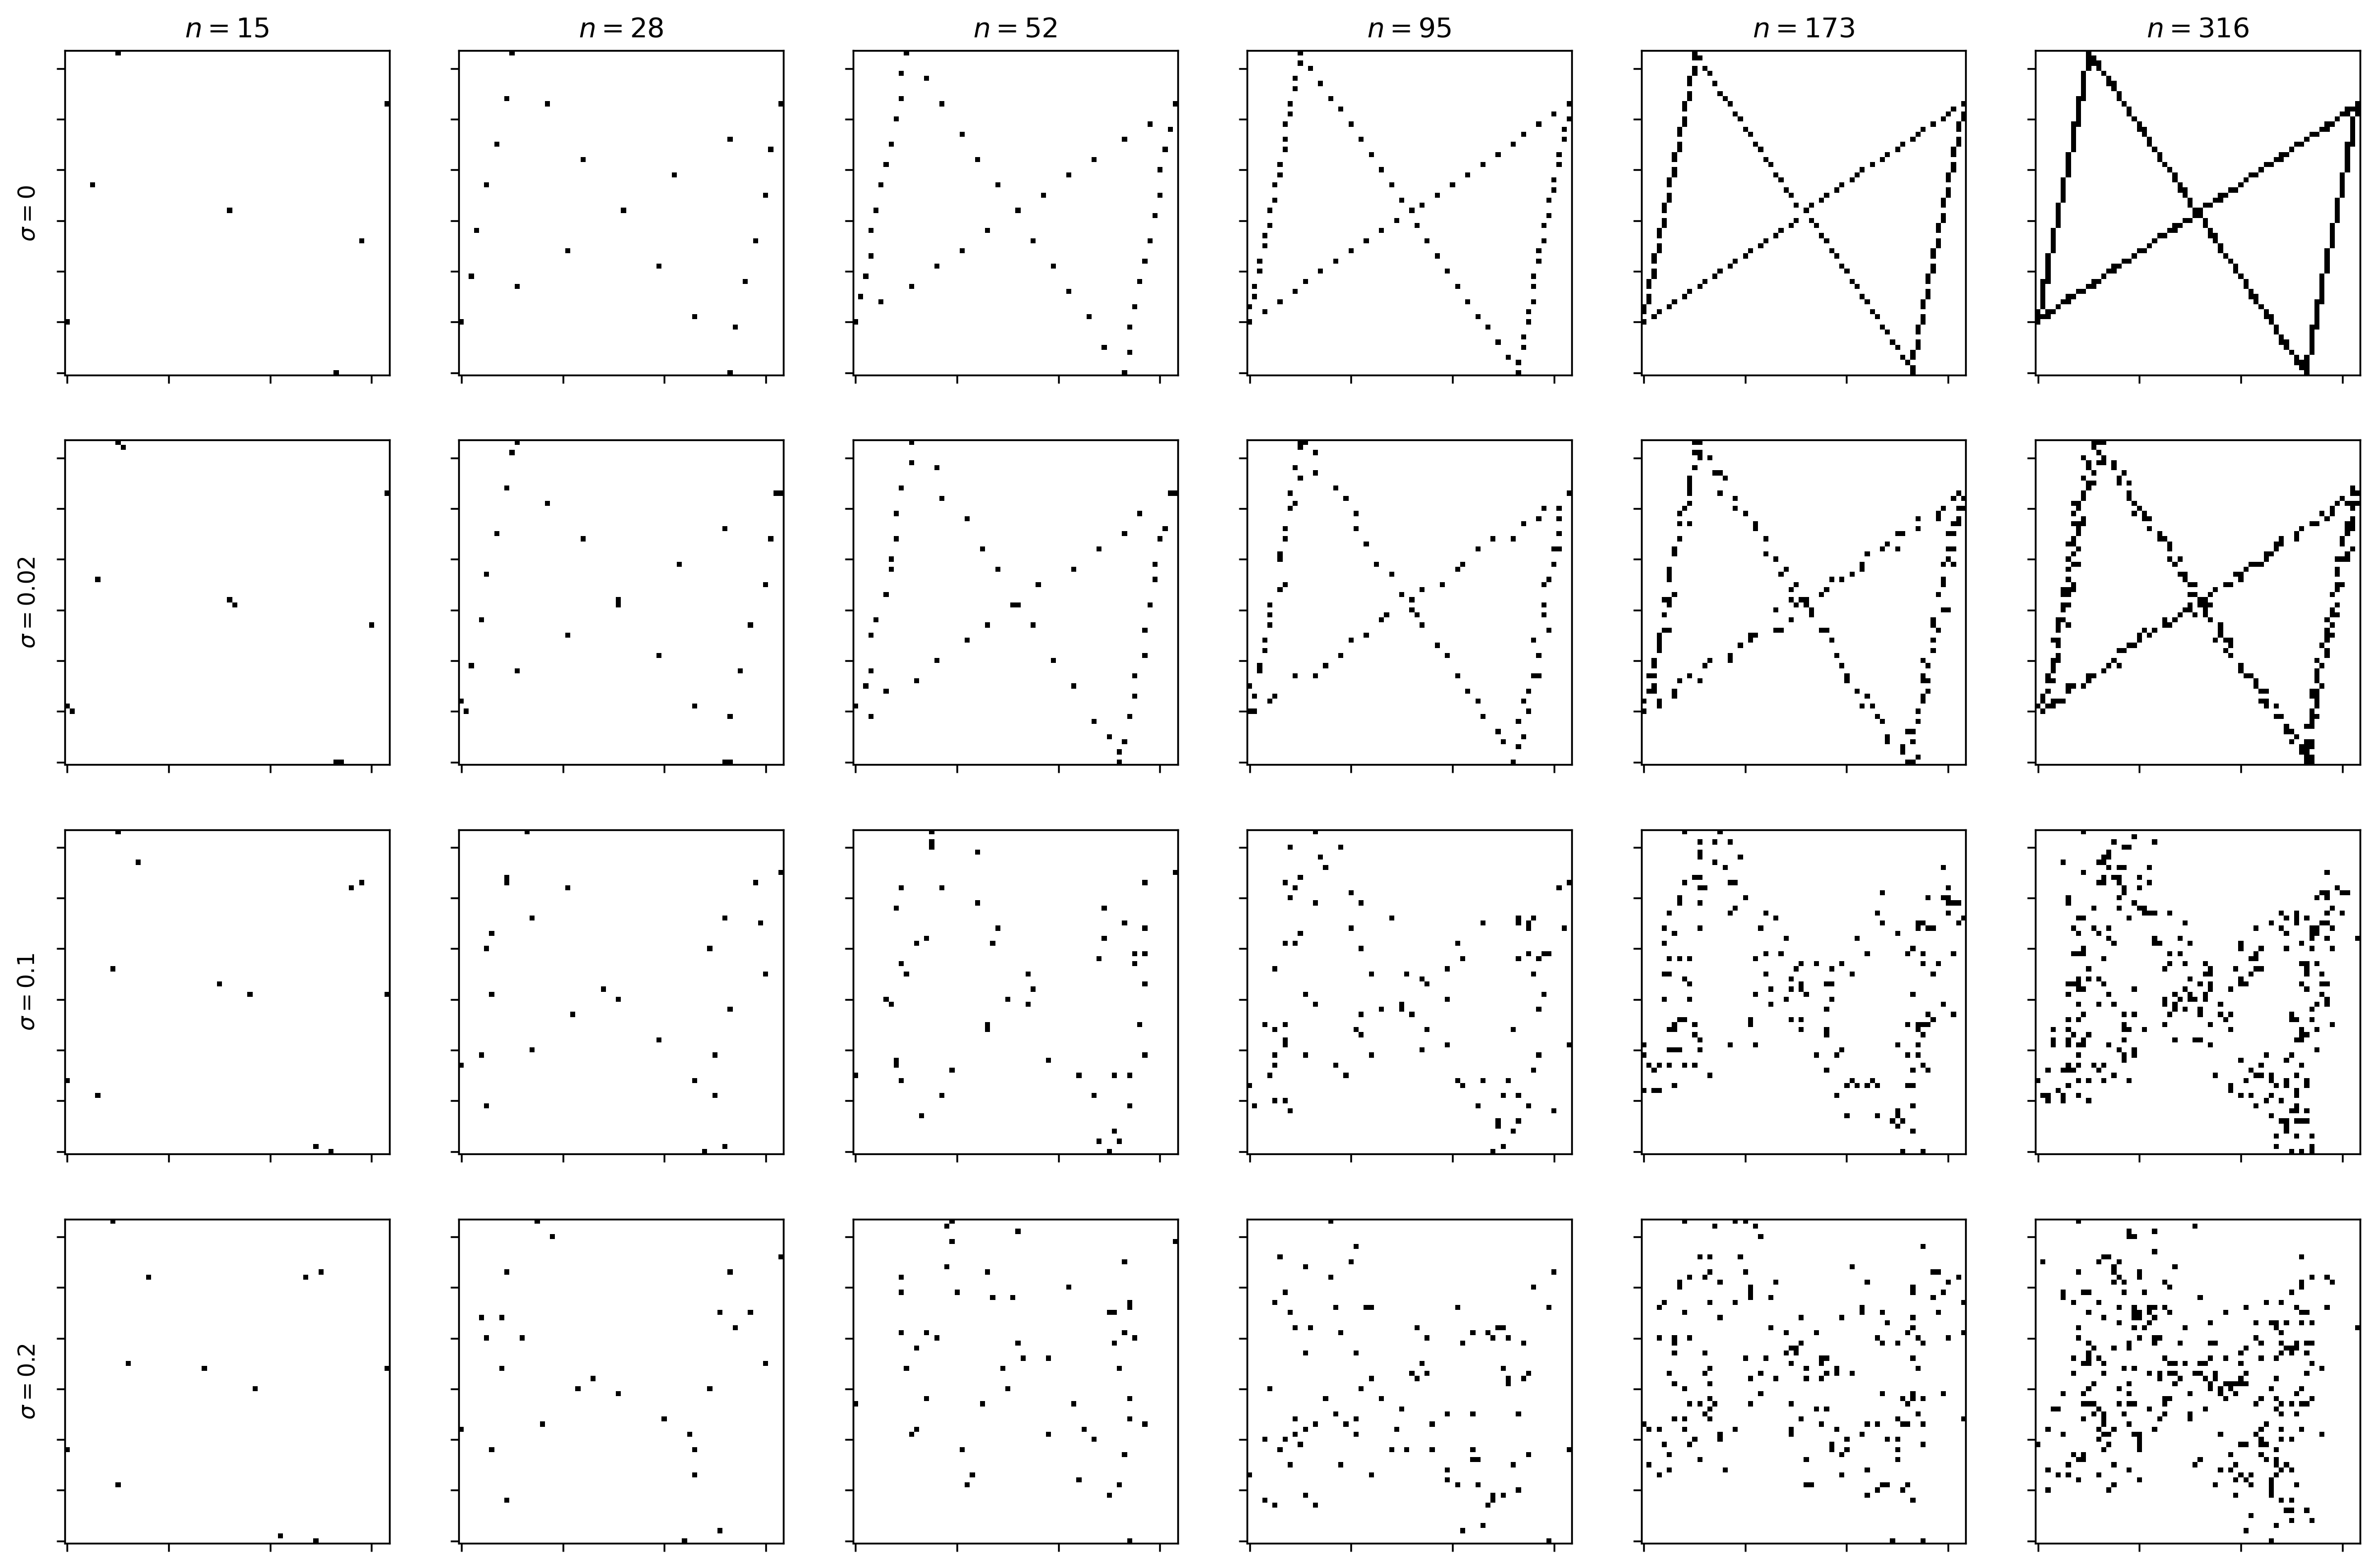

In [63]:
delta = .002


res = 64

_, axs = plt.subplots(4, 6, figsize=(6*3, 4*3), dpi=300)
for i, n in enumerate(np.logspace(1.2, 2.5, 6, dtype=int)):
    axs[0, i].set_title(f'$n = {n}$')
    for j, sig in enumerate([0, .02, .1, .2]):
        if i == 0:
            axs[j, 0].set_ylabel(f'$\sigma = {sig}$')
        axs[j, i].axes.xaxis.set_ticklabels([])
        axs[j, i].axes.yaxis.set_ticklabels([])

        np.random.seed(17)
        shape = Shape2D.generate_open_shape(unif_ratio=0, res=res, n_points=n, sigmas=[sig], sigmas_p=[1])

        data = shape['data']
        gt_data = shape['gt_data']
        noisy_data = shape['noisy_data']
        voxel = shape['vox']
        corners = shape['corners']

        axs[j, i].imshow(1-voxel.T, cmap='gray', origin='lower')

In [51]:
delta

0.002

Generating 15 points with delta=0.005...
iter 1: 0.00%
iter 2: 10.45%
iter 3: 45.46%
iter 4: 97.90%
Generating 15 points with delta=0.005...
iter 1: 0.00%
iter 2: 12.32%
iter 3: 49.25%
Generating 15 points with delta=0.005...
iter 1: 0.00%
iter 2: 11.08%
iter 3: 45.44%
iter 4: 96.33%
Generating 15 points with delta=0.005...
iter 1: 0.00%
iter 2: 11.67%
iter 3: 47.31%
iter 4: 97.40%
Generating 28 points with delta=0.005...
iter 1: 0.00%
iter 2: 12.12%
iter 3: 44.02%
iter 4: 90.87%
Generating 28 points with delta=0.005...
iter 1: 0.00%
iter 2: 12.37%
iter 3: 43.36%
iter 4: 88.64%
Generating 28 points with delta=0.005...
iter 1: 0.00%
iter 2: 11.87%
iter 3: 43.76%
iter 4: 89.43%
Generating 28 points with delta=0.005...
iter 1: 0.00%
iter 2: 12.29%
iter 3: 41.85%
iter 4: 84.07%
Generating 52 points with delta=0.005...
iter 1: 0.00%
iter 2: 6.10%
iter 3: 26.32%
iter 4: 53.90%
iter 5: 85.15%
Generating 52 points with delta=0.005...
iter 1: 0.00%
iter 2: 7.37%
iter 3: 30.32%
iter 4: 62.35%
it

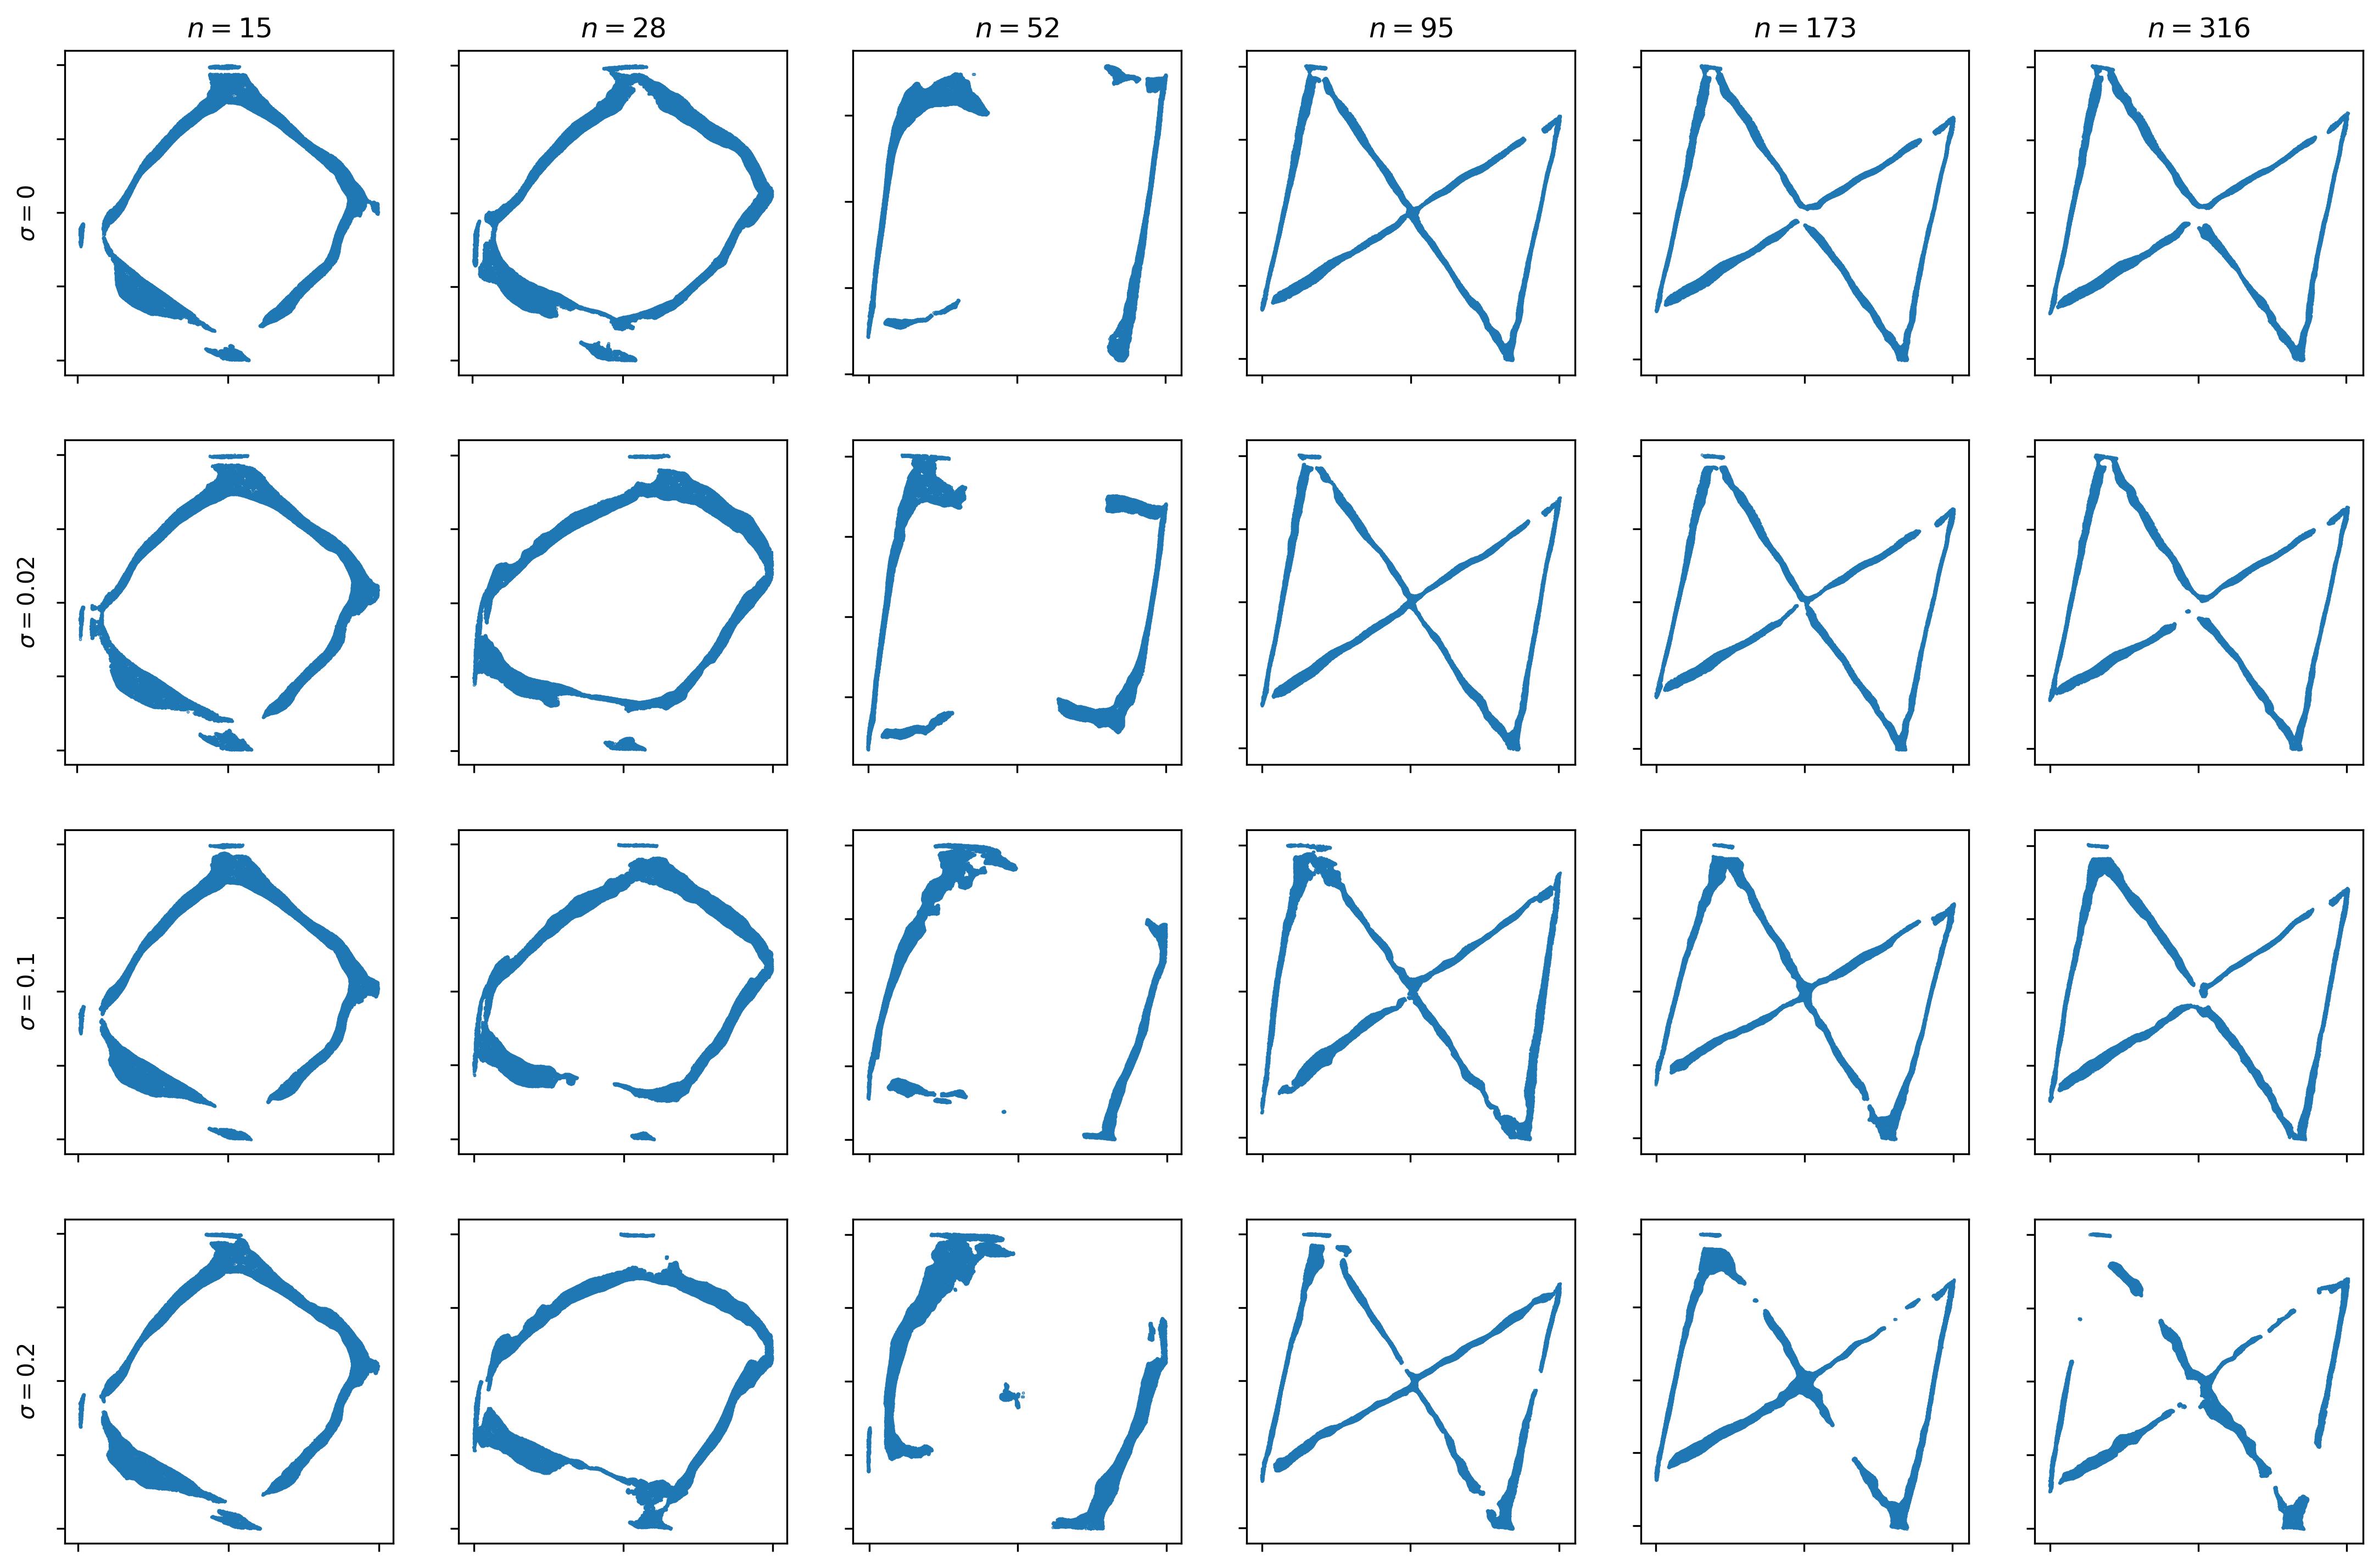

In [64]:
deltas = [.08, .08, .08, .08]
delta = 0.005

best_model = 'vibrant-deluge-306/epoch=67-step=54400.ckpt'
model = NDF.load_from_checkpoint(f'checkpoints/{best_model}')
model.eval()

res = 32

_, axs = plt.subplots(4, 6, figsize=(6*3, 4*3), dpi=300)
for i, n in enumerate(np.logspace(1.2, 2.5, 6, dtype=int)):
    axs[0, i].set_title(f'$n = {n}$')
    for j, sig in enumerate([0, .02, .1, .2]):
        if i == 0:
            axs[j, 0].set_ylabel(f'$\sigma = {sig}$')
        axs[j, i].axes.xaxis.set_ticklabels([])
        axs[j, i].axes.yaxis.set_ticklabels([])

        np.random.seed(17)
        shape = Shape2D.generate_open_shape(unif_ratio=0, res=res, n_points=n, sigmas=[sig], sigmas_p=[1])
        voxel = th.from_numpy(shape['vox']).float()

        th.manual_seed(0)
        np.random.seed(0)
        dense = dense_point_generation(model, voxel, n=50_000, delta=delta)

        axs[j, i].scatter(dense[:, 0], dense[:, 1], s=.1)

# Dataset

In [ ]:
_, axs = plt.subplots(3, 5, figsize=(5*3, 3*3), dpi=300)

for i, (data, vox, dist) in enumerate(test_dataloader):
    if i == 5:
        break
    data, vox, dist = data[0], vox[0], dist[0]
    axs[0, i].set_title(f'$i={i}$')
    axs[0, i].scatter(data[:, 0], data[:, 1], c='k', s=1)
    axs[0, i].axes.xaxis.set_ticklabels([])
    axs[0, i].axes.yaxis.set_ticklabels([])
    axs[1, i].imshow(1-vox.T, cmap='gray', origin='lower')
    axs[1, i].axes.xaxis.set_ticklabels([])
    axs[1, i].axes.yaxis.set_ticklabels([])
    axs[2, i].scatter(data[:, 0], data[:, 1], c=dist, cmap='viridis', s=1)
    axs[2, i].axes.xaxis.set_ticklabels([])
    axs[2, i].axes.yaxis.set_ticklabels([])
    if i == 0:
        axs[0, i].set_ylabel('$\mathcal{P}_i$')
        axs[1, i].set_ylabel('$\mathcal{V}_i$')
        axs[2, i].set_ylabel('$UDF(\mathcal{P}_i, \mathcal{S}_i)$')